In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

pth_log = os.getcwd() + '/logs/nodes_30'
n_nodes = 30

%matplotlib inline

In [2]:
# create data
x_data = np.linspace(-1,1,300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

In [3]:
def fc_layer(input, size_in, size_out, activation_function=None, name='fc'):
    with tf.name_scope(name):
        w = tf.Variable(tf.random_normal([size_in, size_out]), name='weight')
        b = tf.Variable(tf.constant(0.1, shape=[size_out]), name='bias')
        w_b = tf.matmul(input, w) + b
        
        # stores the values for the log
        tf.summary.histogram('weight', w)
        tf.summary.histogram('bias', b)

        if activation_function is None:
            outputs = w_b
        else:
            outputs = activation_function(w_b)

        return outputs

In [4]:
# starts the tensorflow stuff
x = tf.placeholder(tf.float32, [None, 1], name='x')
y = tf.placeholder(tf.float32, [None, 1], name='y')

In [5]:
# make the layers
l1 = fc_layer(x, 1, n_nodes, activation_function=tf.nn.relu, name='layer_1')
preds = fc_layer(l1, n_nodes, 1, name='final_layer')

# get the error
with tf.name_scope('train_and_accuracy'):
    error = tf.reduce_mean(tf.reduce_sum(tf.square(y - preds), reduction_indices=[1]))
    tf.summary.scalar('error', error)
    train_step = tf.train.GradientDescentOptimizer(0.01).minimize(error)

In [6]:
# initializes the variables and starts the session
summ = tf.summary.merge_all()

sess = tf.Session()
sess.run(tf.global_variables_initializer())

writer = tf.summary.FileWriter(pth_log)
writer.add_graph(sess.graph)

In [7]:
for i in range(5000):
    sess.run(train_step, feed_dict={x: x_data, y: y_data})
    
    if i % 100 == 0:
        [step_error, s] = sess.run([error, summ], feed_dict={x: x_data, y: y_data})
        writer.add_summary(s, i)
        print('Step: %d \nError: %s' % (i, step_error))
    
#     if i % 500 == 0:
#         step_error = sess.run(error, feed_dict={x: x_data, y: y_data})
#         print('Step: %d' % i)
#         print(step_error)
        

Step: 0 
Error: 0.32319
Step: 100 
Error: 0.0127578
Step: 200 
Error: 0.00713351
Step: 300 
Error: 0.0059626
Step: 400 
Error: 0.00538429
Step: 500 
Error: 0.00497008
Step: 600 
Error: 0.00463074
Step: 700 
Error: 0.00436083
Step: 800 
Error: 0.00415576
Step: 900 
Error: 0.00400228
Step: 1000 
Error: 0.00388637
Step: 1100 
Error: 0.00378781
Step: 1200 
Error: 0.00371414
Step: 1300 
Error: 0.00365248
Step: 1400 
Error: 0.00359637
Step: 1500 
Error: 0.00354608
Step: 1600 
Error: 0.003504
Step: 1700 
Error: 0.00347033
Step: 1800 
Error: 0.00343444
Step: 1900 
Error: 0.00340277
Step: 2000 
Error: 0.00337701
Step: 2100 
Error: 0.00335215
Step: 2200 
Error: 0.0033331
Step: 2300 
Error: 0.00331685
Step: 2400 
Error: 0.00330201
Step: 2500 
Error: 0.00328857
Step: 2600 
Error: 0.00327614
Step: 2700 
Error: 0.00326648
Step: 2800 
Error: 0.00325837
Step: 2900 
Error: 0.00325073
Step: 3000 
Error: 0.00324251
Step: 3100 
Error: 0.00323488
Step: 3200 
Error: 0.00322827
Step: 3300 
Error: 0.00322099


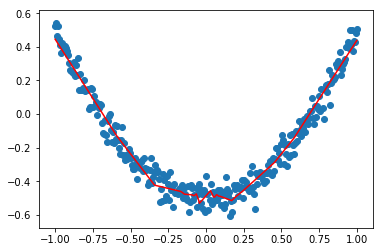

In [8]:
# plot the results
y_hat = sess.run(preds, feed_dict={x: x_data, y: y_data})
plt.scatter(x_data, y_data)
plt.plot(x_data, y_hat, color='red')
plt.show()